In [88]:
# video link
# https://drive.google.com/file/d/1NBRGciwZ2qyf-BAyKp5t4f2KtbuhX12u/view?usp=sharing

In [89]:
# down-grading version of some of the packages. so the gensim lib is compatible with other libraries.
# first executing these commented code lines then commenting again

# !pip uninstall -y gensim numpy scipy
# !pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1


In [90]:

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string
import re
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [91]:
#load dataset
df = pd.read_csv('/content/Imdb.csv')
print("shape:", df.shape)
df.head()

shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [92]:

print(df.info())

print(df['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [93]:
# text processing

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<.*?>', '', str(text))

    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()

    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()

    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    text =  ' '.join(tokens)

    return text

df['cleaned_review'] = df['review'].apply(clean_text)


In [94]:

df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


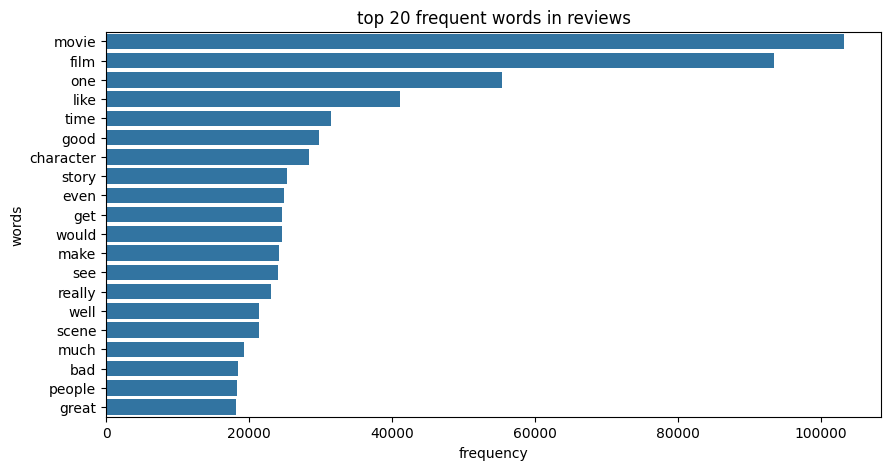

In [95]:
#top words in the dataset


allWords = ' '.join(df['cleaned_review']).split()
wordFreq = Counter(allWords)

commonWords = wordFreq.most_common(20)

words = [word for word, count in commonWords]
counts = [count for word, count in commonWords]

plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=words)

plt.title("top 20 frequent words in reviews")

plt.xlabel("frequency")
plt.ylabel("words")

# plt.grid(axis='x')

plt.show()


In [96]:
#extracting features
tfidf = TfidfVectorizer(max_features=1000)

X_input_review = tfidf.fit_transform(df['cleaned_review']).toarray()

y_input_label = df['sentiment'].map({'positive': 1, 'negative': 0})

In [97]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_input_review, y_input_label, test_size=0.2, random_state=55)

In [98]:
# traingin the model
model = LogisticRegression(max_iter=220)

model.fit(X_train, y_train)

LogisticRegression(max_iter=220)

In [99]:
# evaluation
y_pred = model.predict(X_test)

print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("f1 score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

print("\nreport:\n", classification_report(y_test, y_pred))

accuracy: 0.8627
precision: 0.8627169527175959
recall: 0.8627
f1 score: 0.8627021872651387

report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      5043
           1       0.86      0.86      0.86      4957

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



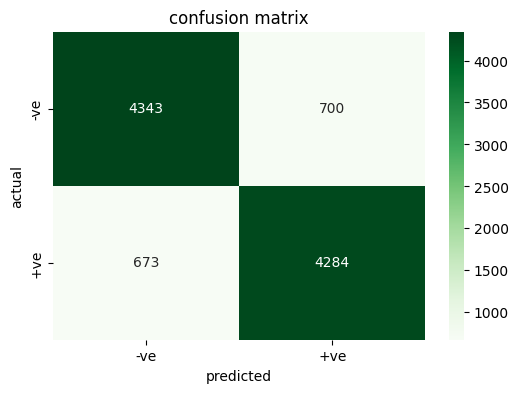

In [100]:

# confusion-matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['-ve', '+ve'], yticklabels=['-ve', '+ve'])

plt.xlabel('predicted')
plt.ylabel('actual')

plt.title('confusion matrix')

plt.show()


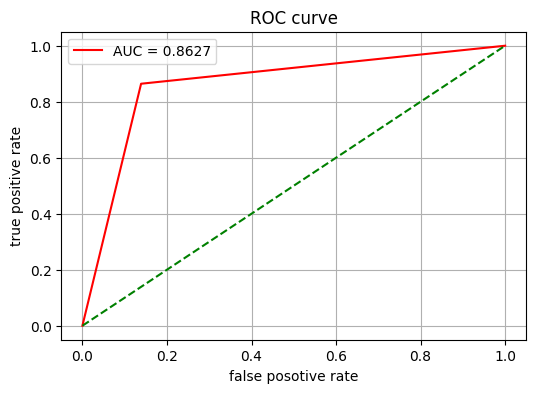

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

rocAuc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, label=f'AUC = {rocAuc:.4f}', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='green')

plt.ylabel('true positive rate')
plt.xlabel('false posotive rate')


plt.title('ROC curve')

plt.legend()

plt.grid(True)

plt.show()

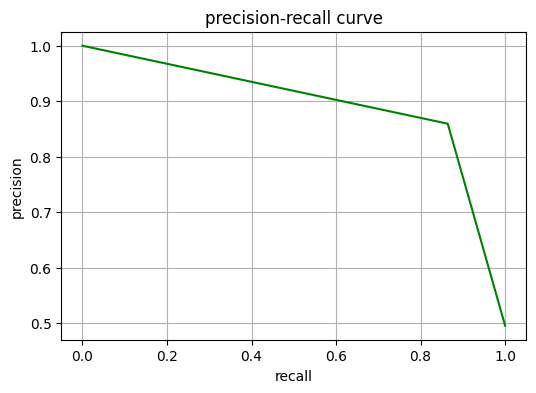

In [102]:
from sklearn.metrics import  precision_recall_curve

#precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green')
# plt.fill_between(recall, precision, alpha=0.2)
plt.xlabel('recall')
plt.ylabel('precision')


plt.title('precision-recall curve')

plt.grid(True)
plt.show()

In [103]:
#predicting sentiment with user input

def predictSentiment(review):
  # Cleaning the input
  cleaned_review = clean_text(review)

  #vectorizing
  vectorized = tfidf.transform([cleaned_review])

  #predictting
  prediction = model.predict(vectorized)[0]

  probability = model.predict_proba(vectorized)[0]

  # result
  sentiment = "positive" if prediction == 1 else "negative"
  confidence = np.max(probability)

  print(f"\nreview: {review}")

  print(f"predicted-sentiment: {sentiment} (confidence: {confidence:.4f})\n")


sampleReview = "i liked the movie, it is full of action and drama"
predictSentiment(sampleReview)


myRev = input("Enter new review: \n")
predictSentiment(myRev);



review: i liked the movie, it is full of action and drama
predicted-sentiment: positive (confidence: 0.9020)

Enter new review: 
did not like much

review: did not like much
predicted-sentiment: negative (confidence: 0.7789)

